In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final assignment/water_potability.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
shape = df.shape
print(shape)

(3276, 10)


In [ ]:
print("Missing values: ")
df.isnull().sum()

Missing values: 


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
print("Dataset Preview: ")
df.head()

Dataset Preview: 


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


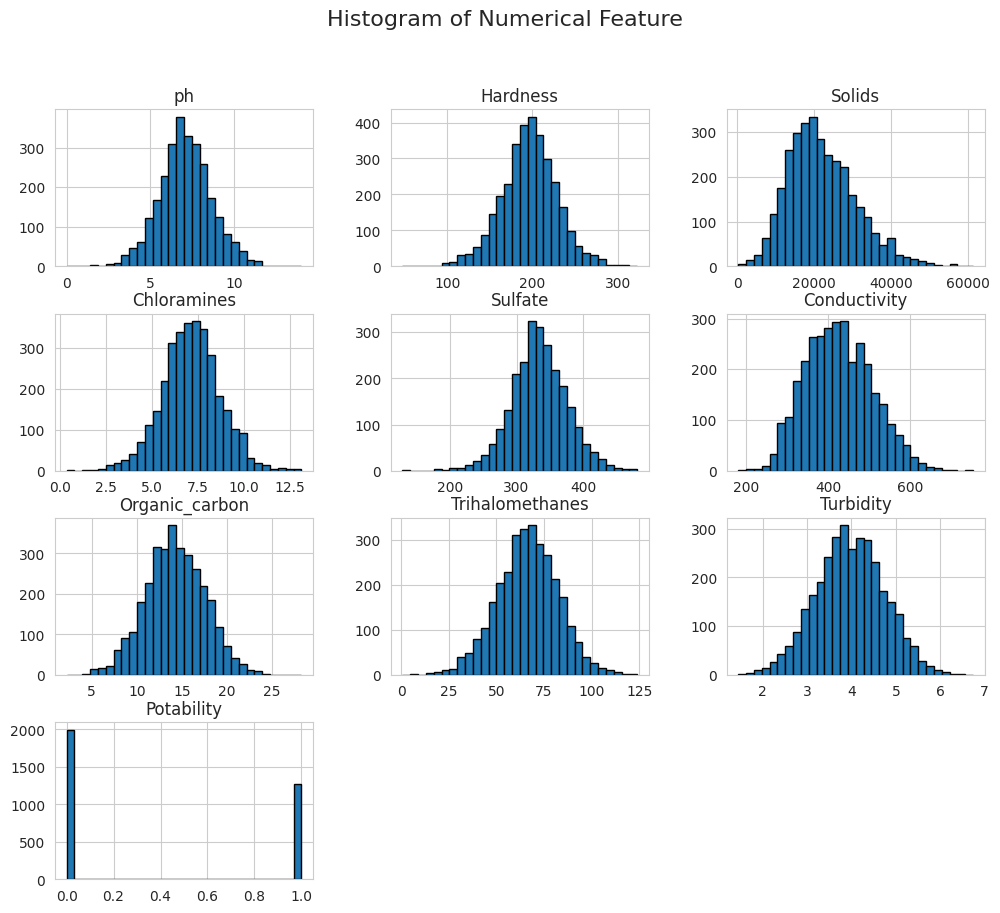

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set the style for the plots
sns.set_style("whitegrid")

df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numerical Feature", fontsize =16)
plt.show()

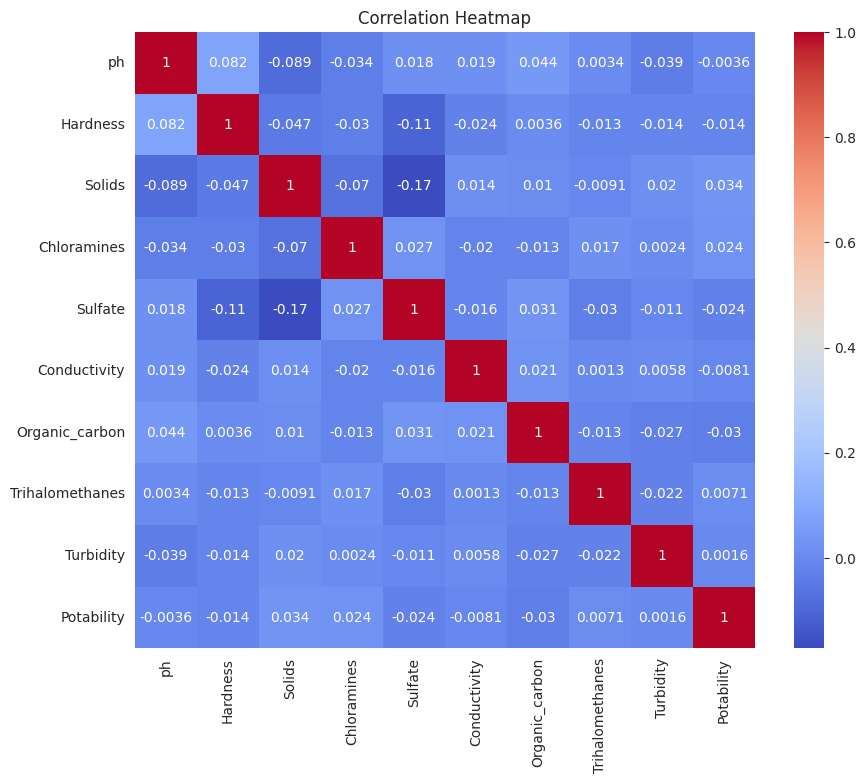

In [ ]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-88-8d1f814a264c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette="viridis", order=df['Potability'].value_counts().index)


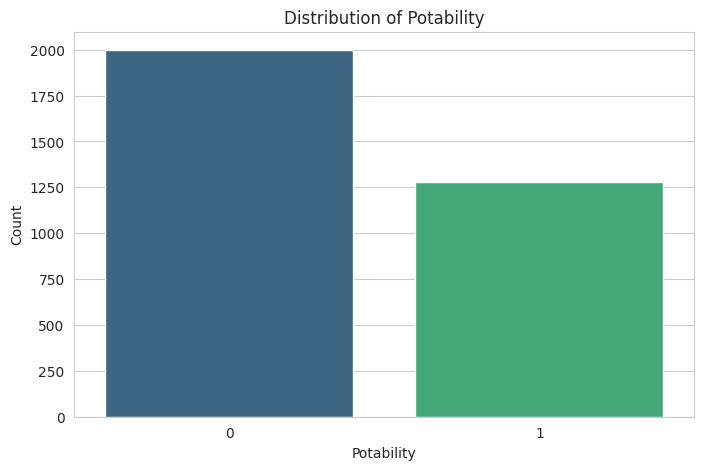

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='Potability', data=df, palette="viridis", order=df['Potability'].value_counts().index)
plt.title("Distribution of Potability")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

**Model from scratch**

In [ ]:
import numpy as np
import pandas as pd

# Encode categorical target variable manually
unique_classes = df['Potability'].unique()
class_map = {cls: idx for idx, cls in enumerate(unique_classes)}
df['Potability'] = df['Potability'].map(class_map)

#Define features and target
x=df.drop(columns=['Potability']).values
y=df['Potability'].values

# Manual train-test split (80-20 split)
n_samples = x.shape[0]
indices = np.arange(n_samples)
np.random.shuffle(indices)
split_idx = int(0.8 * n_samples)
train_idx, test_idx = indices[:split_idx], indices[split_idx:]
x_train, x_test = x[train_idx], x[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Initialize weights and bias
n_features = x_train.shape[1]
n_classes = len(unique_classes)
is_binary = n_classes == 2
weights = np.zeros((n_features, n_classes if not is_binary else 1))
bias = np.zeros(n_classes if not is_binary else 1)

# Define sigmoid and softmax activation functions
def sigmoid(z):
  return 1 / (1 + np.exp(-z)) # Change np.exe to np.exp

def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def predict_proba(X, weights, bias):
  z = np.dot(X, weights) + bias
  return sigmoid(z) if is_binary else softmax(z)

# One-hot encoding for multi-class classification
if not is_binary:
  y_train_onehot = np.eye(n_classes)[y_train]

# Training using Gradient Descent
learning_rate = 0.1
epochs = 1000
for epoch in range(epochs):
  y_pred = predict_proba(x_train, weights, bias)
  if is_binary:
    error = y_pred.flatten() - y_train
    weights -= learning_rate * np.dot(x_train.T, error).reshape(-1, 1) / len(y_train)
    bias -= learning_rate * np.sum(error)
  else:
    error = y_pred - y_train_onehot
    weights -= learning_rate * np.dot(x_train.T, error) / len(y_train)
    bias -= learning_rate * np.sum(error, axis=0)


#predictions
train_proba = predict_proba(x_train, weights, bias)
test_proba = predict_proba(x_test, weights, bias)

y_train_pred = (train_proba.flatten() >= 0.5).astype(int) if is_binary else np.argmax(train_proba, axis=1)
y_test_pred = (test_proba.flatten() >= 0.5).astype(int) if is_binary else np.argmax(test_proba, axis=1)

#manual accuracy caluclation
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.6115
Test Accuracy: 0.6037


**Primary model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

#Make prediction for train and test sets
rf_train_pred = rf_classifier.predict(x_train)
rf_test_pred = rf_classifier.predict(x_test)

# Compute accuracy for train and test sets using Random Forest
train_accuracy_rf = accuracy_score(y_train, rf_train_pred)
test_accuracy_rf = accuracy_score(y_test, rf_test_pred)

train_accuracy_rf, test_accuracy_rf

(1.0, 0.6661585365853658)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on train and test sets
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Compute accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy


(0.6053435114503817, 0.6280487804878049)

**Hyper-parameter Optimization with Cross-Validation**

Logistic regression


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load dataset (assuming df is already defined)
if 'Potability' in df.columns:
    label_encoder = LabelEncoder()
    df['Potability'] = label_encoder.fit_transform(df['Potability'])
else:
    raise ValueError("Dataset does not contain 'Potability' column.")

# Define features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Handle missing values
if X.isnull().sum().sum() > 0:
    X.fillna(X.mean(), inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Perform GridSearchCV for Logistic Regression
log_reg = LogisticRegression()
grid_search_logreg = GridSearchCV(log_reg, logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_scaled, y_train)

# Get best hyperparameters for Logistic Regression
best_params_log_reg = grid_search_logreg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_log_reg)
print("Best Accuracy for Logistic Regression:", grid_search_logreg.best_score_)


Best Hyperparameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Best Accuracy for Logistic Regression: 0.6099236641221374


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Encode the target variable
label_encoder = LabelEncoder()
df['Potability'] = label_encoder.fit_transform(df['Potability'])

# Define features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

#perform Gridsearchcv
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.6


Feature selection

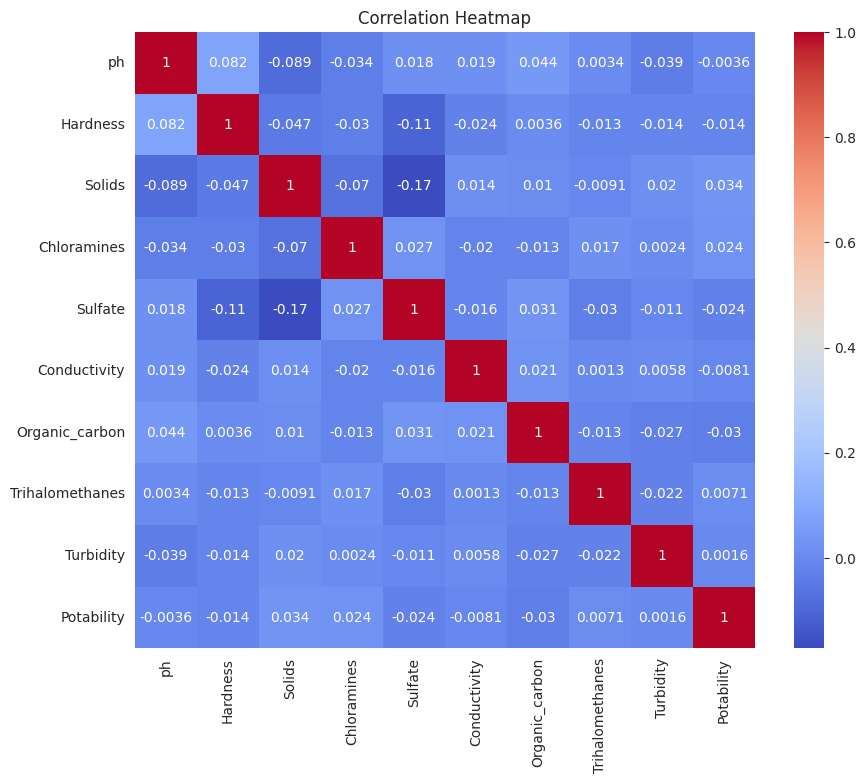

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Final model

Selected features before removing correlated features:
['Solids', 'Chloramines']
Selected features after removing correlated ones:
['Solids', 'Chloramines']
Selected Features: ['Solids', 'Chloramines']
Missing values after filling: 0
X_train shape: (2620, 2), X_test shape: (656, 2)
y_train shape: (2620,), y_test shape: (656,)
Logistic Regression - Train Accuracy: 0.6099, Test Accuracy: 0.6098
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.5655

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.74      0.68       400
           1       0.42

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


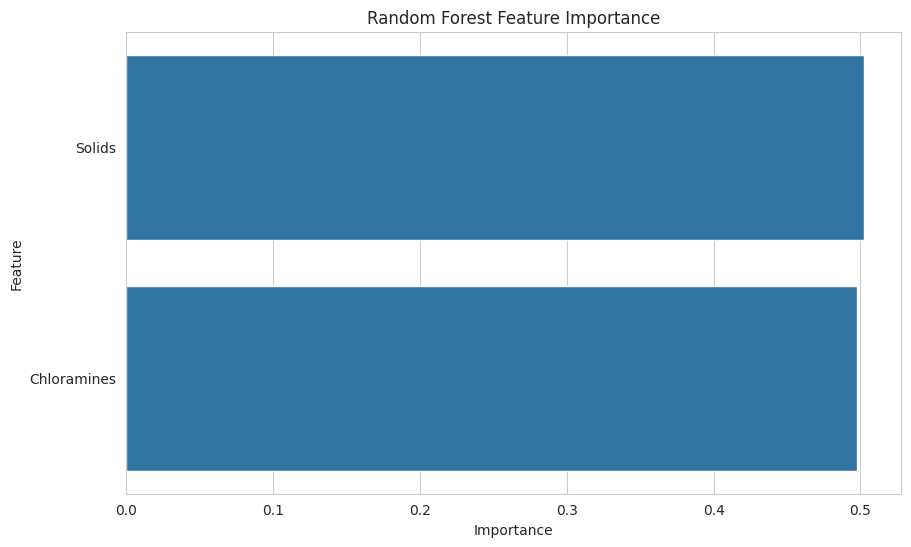

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (assuming df is already defined)
if 'Potability' in df.columns:
    label_encoder = LabelEncoder()
    df['Potability'] = label_encoder.fit_transform(df['Potability'])
else:
    raise ValueError("Dataset does not contain 'Potability' column.")

# Compute correlation matrix
corr_matrix = df.corr()

# Select features highly correlated with the target
target_corr = corr_matrix['Potability'].sort_values(ascending=False)
selected_features = target_corr[target_corr > 0.01].index.tolist()
selected_features.remove('Potability')

# Remove highly correlated features (multicollinearity)
print("Selected features before removing correlated features:")
print(selected_features)

# Remove highly correlated features (multicollinearity)
corr_threshold = 0.7  # Try lowering this threshold to 0.7 or even 0.6
corr_pairs = corr_matrix.loc[selected_features, selected_features].abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
to_drop = set()
for (f1, f2), corr_value in corr_pairs.items():
    if corr_value > corr_threshold and f1 not in to_drop:
        to_drop.add(f2)

# Final selected features after removal of highly correlated features
selected_features = [f for f in selected_features if f not in to_drop]
print("Selected features after removing correlated ones:")
print(selected_features)

if not selected_features:
    raise ValueError("No features selected based on correlation threshold.")

# Print selected features to inspect
print(f"Selected Features: {selected_features}")

# Define features and target
X = df[selected_features]
y = df['Potability']

# Handle missing values
if X.isnull().sum().sum() > 0:
    print(f"Missing values found in X. Filling missing values with column means.")
    X.fillna(X.mean(), inplace=True)

# Check for missing values again
print(f"Missing values after filling: {X.isnull().sum().sum()}")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check if the split data is valid
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimal hyperparameters from previous GridSearchCV
best_params_log_reg = {'C': 1, 'solver': 'liblinear', 'max_iter': 100}
best_params_rf = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Train Logistic Regression with best hyperparameters
log_reg = LogisticRegression(**best_params_log_reg, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Train Random Forest with best hyperparameters
rf = RandomForestClassifier(**best_params_rf, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_log = log_reg.predict(X_train_scaled)
y_test_pred_log = log_reg.predict(X_test_scaled)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Compute accuracy scores
train_accuracy_log = accuracy_score(y_train, y_train_pred_log)
test_accuracy_log = accuracy_score(y_test, y_test_pred_log)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print accuracy results
print(f"Logistic Regression - Train Accuracy: {train_accuracy_log:.4f}, Test Accuracy: {test_accuracy_log:.4f}")
print(f"Random Forest - Train Accuracy: {train_accuracy_rf:.4f}, Test Accuracy: {test_accuracy_rf:.4f}")

# Display classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_test_pred_log))
print("Random Forest Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# Display confusion matrices
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_log))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()
